In [5]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

os.chdir('/home/david/Desktop/projects/thesis/downstream_classification')
metadata = pd.read_csv('./data/combined_data/metadata_only_existant_readings_09042023.csv', index_col=0)
metadata

,sample,reading,dates,one_year_until_death,CVA,first_AF_in_home_ECG,first_AF_in_Dispatch,AF,IHD,sp_MI_all,...,Patient ID,Customer_BirthDate,Age_at_start,dates_datetime,approximate_death_datetime,time_until_approximate_death,days_until_approximate_death,Customer_BirthDate_datetime,Customer_BirthDate_1900,age_days
0,train,427805,20/01/2008,0,0.0,1.0,1.0,1.0,0.0,0.0,...,9476623.0,8/16/28,70.0,2008-01-20,NaN,NaN,NaN,1928-01-08 00:16:00,8/16/1928,29231.0
1,train,356921,23/02/2010,0,0.0,0.0,0.0,0.0,1.0,0.0,...,69592780.0,1/1/27,82.0,2010-02-23,2019-04-01,3324 days,3324.0,1927-01-01 00:01:00,1/1/1927,30368.0
2,train,428248,19/12/2015,0,0.0,0.0,0.0,0.0,1.0,0.0,...,247147.0,3/19/25,65.0,2015-12-19,NaN,NaN,NaN,1925-01-03 00:19:00,3/19/1925,33221.0
3,train,440621,18/08/2017,0,0.0,1.0,1.0,1.0,0.0,0.0,...,77799815.0,7/30/40,74.0,2017-08-18,NaN,NaN,NaN,1940-01-07 00:30:00,7/30/1940,28347.0
4,train,32229,10/07/2019,0,0.0,1.0,1.0,1.0,1.0,0.0,...,42983130.0,1/8/46,70.0,2019-07-10,NaN,NaN,NaN,1946-01-01 00:08:00,1/8/1946,26852.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371302,test,387849,01/04/2001,0,0.0,0.0,0.0,0.0,0.0,0.0,...,9955139.0,10/18/26,75.0,2001-04-01,2007-10-27,2400 days,2400.0,1926-01-10 00:18:00,10/18/1926,27474.0
371303,test,395752,23/04/2012,0,0.0,0.0,0.0,0.0,1.0,1.0,...,56740855.0,10/20/60,51.0,2012-04-23,NaN,NaN,NaN,1960-01-10 00:20:00,10/20/1960,19096.0
371304,test,434377,03/09/2012,0,0.0,0.0,0.0,0.0,0.0,0.0,...,51432441.0,6/21/52,50.0,2012-09-03,2020-01-23,2698 days,2698.0,1952-01-06 00:21:00,6/21/1952,22155.0
371305,test,384590,10/09/2000,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1398346.0,1/1/36,64.0,2000-09-10,NaN,NaN,NaN,1936-01-01 00:01:00,1/1/1936,23628.0


Number of observations= 371307
Number of observations by sample


train         262598
test           55451
validation     53258
Name: sample, dtype: int64

Target


0.0    278141
1.0     93166
Name: AF, dtype: int64

Obe year until death


0    360568
1     10739
Name: one_year_until_death, dtype: int64

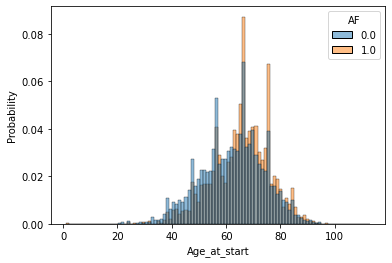

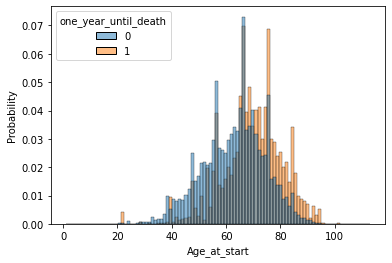

In [28]:
print('Number of observations=',len(metadata))
print('Number of observations by sample')
display(metadata['sample'].value_counts())
print('Target')
display(metadata['AF'].value_counts())
print('Obe year until death')
display(metadata['one_year_until_death'].value_counts())

mask = metadata['Age_at_start']>0
sns.histplot(data = metadata[mask], x='Age_at_start', hue = 'AF', common_norm=False, stat='probability', bins = 100)
plt.show()

sns.histplot(data = metadata[mask], x='Age_at_start', hue = 'one_year_until_death', common_norm=False, stat='probability', bins = 100)
plt.show()


Total number of people: 33825
Total number of people (Train): 23713
Total number of people (Validation): 5072
Total number of people (Test): 5040
Cumsum-10: 0.749859571322986
Cumsum-25: 0.9149445676274943
Cumsum-50: 0.9690761271249075
Cumsum-75: 0.9840059127864006


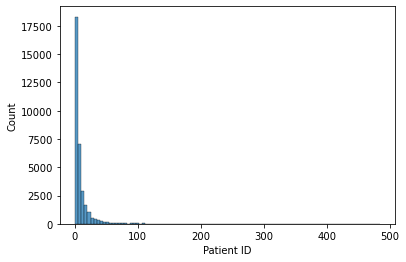

In [33]:
print('Total number of people:', len(metadata['Patient ID'].unique()))
print('Total number of people (Train):', len(metadata[metadata['sample']=='train']['Patient ID'].unique()))
print('Total number of people (Validation):', len(metadata[metadata['sample']=='validation']['Patient ID'].unique()))
print('Total number of people (Test):', len(metadata[metadata['sample']=='test']['Patient ID'].unique()))

metadata_grouped = metadata.groupby(['Patient ID'])['Patient ID'].count()

mask = metadata_grouped<500
sns.histplot(metadata_grouped[mask], bins=100)
print('Cumsum-10:', metadata_grouped.value_counts(normalize=True)[:10].sum())
print('Cumsum-25:', metadata_grouped.value_counts(normalize=True)[:25].sum())
print('Cumsum-50:', metadata_grouped.value_counts(normalize=True)[:50].sum())
print('Cumsum-75:', metadata_grouped.value_counts(normalize=True)[:75].sum())

In [34]:
# without to with
without_to_with = metadata.groupby(['Patient ID'])['AF'].nunique()
without_to_with.value_counts(normalize=True)

1    0.90507
2    0.09493
Name: AF, dtype: float64

In [36]:
mask = metadata['AF'] == 1

print(metadata[mask]['Age_at_start'].mean(), metadata[mask]['Age_at_start'].std())
print(metadata[~mask]['Age_at_start'].mean(), metadata[~mask]['Age_at_start'].std())

65.54136702230427 10.659471056582833
62.38304413564691 11.770941235692483


In [44]:
mask = metadata['Age_at_start']>0
metadata[mask][['Age_at_start']].describe()

,Age_at_start
count,370928.000000
mean,63.181342
std,11.554503
min,1.000000
25%,55.000000
50%,64.000000
75%,71.000000
max,113.000000


# Missing leads

In [57]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from tqdm import tqdm

# Set root
# os.chdir('/Users/davidharar/Documents/School/thesis/downstream_classification')

from modeling.Inception import *


def plot_roc_auc(y_pred, y_true):
    from sklearn.metrics import roc_curve, auc

    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.legend()
    plt.title('ROC curve')
    plt.show()

def plot_prc(y_pred,y_true):
    from sklearn.metrics import precision_recall_curve, auc
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
    auc_pr = auc(recall, precision)
    plt.plot(recall, precision, label='ROC curve (area = %0.2f)' % auc_pr)
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend()
    plt.title("Precision-Recall Curve")
    plt.show()

def _get_sample(signal_index,data_path, data, targets=['one_year_until_death']):
    """
    load the relevant <lead> reading .npy file from <data_folder_path>. 
    Inputs:
    - signal_index: int
    - data_folder_path:str. The path to the folder when the desired file can be loaded from
    """

    file_name = f'{signal_index}.npy'
    X = np.load(data_path+file_name, allow_pickle=True)
    y = data[data['reading'] == signal_index][targets].values
    if len(y)>1:
        y = np.expand_dims(y[0],-1)
    return X,y

def preprocessing_a_reading(reading, data, model, relevant_leads_indices, targets=['one_year_until_death'], fillna=0):
    """
    All the preprocessing needed in order to be able to add a reading into the model    
    """
    # load reading
    x_test_reading, _ = _get_sample(reading,data_path='./data/individual-signals/', data=data, targets=targets)
    
    # encode
    x_test_reading = np.float32(x_test_reading)
                
    # take only relevant leads
    x_test_reading = x_test_reading[relevant_leads_indices]

    # adjust dimensions
    x_test_reading = np.expand_dims(x_test_reading,0)
    
    # keep the number non missing leads in reading
    num_nonmissing_leads = [np.count_nonzero(~np.isnan(x_test_reading[j][:,0])) for j in range(len(x_test_reading))]

    # fillna
    x_test_reading = np.nan_to_num(x_test_reading, nan=fillna)

    # encode as torch tensor
    x_test_reading = torch.from_numpy(x_test_reading)
    
    return model(x_test_reading).item(), num_nonmissing_leads


def predict(readings, model, data, device='cuda', leads = ['LI', 'LII', 'LIII', 'aVF', 'aVL', 'aVR','V1','V2','V3','V4','V5','V6'], data_path='./data/individual-signals/', targets=['one_year_until_death'], fillna=0):
    """
    Return scores for `redings` using `model`.    
    """
    leads_and_their_indices = {x:i for i,x in enumerate(['LI', 'LII', 'LIII', 'aVF', 'aVL', 'aVR','V1','V2','V3','V4','V5','V6'])}
    relevant_leads_indices = np.array([leads_and_their_indices[x] for x in leads])
    
    predictions = []
    nonmissing_leads = []
    model.eval()
    with torch.no_grad():

        # return [preprocessing_a_reading(reading, data, model=model, relevant_leads_indices=relevant_leads_indices, targets=['one_year_until_death'], fillna=0) for reading in readings]

        for reading in tqdm(readings, desc='Collecting scores'):
            # load reading
            x_test_reading, _ = _get_sample(reading,data_path='./data/individual-signals/', data=data, targets=targets)
            
            # encode
            x_test_reading = np.float32(x_test_reading)
                        
            # take only relevant leads
            x_test_reading = x_test_reading[relevant_leads_indices]

            # adjust dimensions
            x_test_reading = np.expand_dims(x_test_reading,0)
            
            # keep the number non missing leads in reading
            num_nonmissing_leads = [np.count_nonzero(~np.isnan(x_test_reading[j][:,0])) for j in range(len(x_test_reading))]

            # fillna
            x_test_reading = np.nan_to_num(x_test_reading, nan=fillna)

            # encode as torch tensor
            x_test_reading = torch.from_numpy(x_test_reading).to(device)
            predictions.append(model(x_test_reading).item())
            nonmissing_leads.append(num_nonmissing_leads)

    nonmissing_leads = np.array(nonmissing_leads).reshape(-1)
    return predictions, nonmissing_leads


def post_reg_analysis(data, y_true_column, y_pred_column):

    # plot results
    sns.histplot(data = data, x=y_pred_column, hue = y_true_column, common_norm=False, stat='probability')
    plt.title('Scores Distribution')
    plt.show()

    plot_roc_auc(data[y_pred_column], data[y_true_column])
    plot_prc(data[y_pred_column], data[y_true_column])
    
    data['age_in_years'] = np.round(data['age_days']/365)

    top_frequent_ages = list(data['age_in_years'].value_counts().iloc[:10].index)
    mask = data['age_in_years'].isin(top_frequent_ages)


    data['months_until_death'] = pd.cut(data['days_until_approximate_death'], 
                                        bins=[x*30 for x in range(12)]+[np.inf],labels=[j for j in range(12)])


    sns.boxplot(data = data, y = y_pred_column, x = 'months_until_death',showfliers = False)
    plt.show()

    sns.boxplot(data = data[mask], y = y_pred_column, x = 'age_in_years',showfliers = False)
    plt.show()

    all_targets = ['one_year_until_death', 'CVA', 'first_AF_in_home_ECG', 'first_AF_in_Dispatch', 'AF', 'IHD', 'sp_MI_all', 'sp_CABG', 'CHF', 'sp_CPR', 'cpr_shl', 'DM2', 'AF2', 'DM']
    corr = data[all_targets + [y_true_column, y_pred_column]].corr().round(3)
    plt.figure(figsize=(12,12))
    sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True)
    plt.title('Correlation Among Comorbidities')
    plt.show()

# load model
   
def load_downstream_model(dropout, scale, num_inputs, weights_path, cold_start=False):
    model = DownstreamInception(dropout=dropout, scale=scale, num_inputs=num_inputs).to('cuda')
    if not cold_start:
        model.load_state_dict(torch.load(weights_path))
    return model







downstream_model = load_downstream_model(dropout=0.5,scale=1,num_inputs=12, weights_path='./models/AF-V9/model_val_rocauc.pt')



# load data
data = pd.read_csv('./data/combined_data/metadata_only_existant_readings_09042023.csv',index_col=0)
# data = data[data['sample'] == 'test'].reset_index(drop=True)
predictions, non_missing_leads = predict(data['reading'], downstream_model, data)
data['y_pred'] = predictions
data['non_missing_leads'] = np.array(non_missing_leads).reshape(-1)
data

,sample,reading,dates,one_year_until_death,CVA,first_AF_in_home_ECG,first_AF_in_Dispatch,AF,IHD,sp_MI_all,...,Age_at_start,dates_datetime,approximate_death_datetime,time_until_approximate_death,days_until_approximate_death,Customer_BirthDate_datetime,Customer_BirthDate_1900,age_days,y_pred,non_missing_leads
0,train,427805,20/01/2008,0,0.0,1.0,1.0,1.0,0.0,0.0,...,70.0,2008-01-20,NaN,NaN,NaN,1928-01-08 00:16:00,8/16/1928,29231.0,0.421408,10
1,train,356921,23/02/2010,0,0.0,0.0,0.0,0.0,1.0,0.0,...,82.0,2010-02-23,2019-04-01,3324 days,3324.0,1927-01-01 00:01:00,1/1/1927,30368.0,0.344172,1
2,train,428248,19/12/2015,0,0.0,0.0,0.0,0.0,1.0,0.0,...,65.0,2015-12-19,NaN,NaN,NaN,1925-01-03 00:19:00,3/19/1925,33221.0,0.482600,8
3,train,440621,18/08/2017,0,0.0,1.0,1.0,1.0,0.0,0.0,...,74.0,2017-08-18,NaN,NaN,NaN,1940-01-07 00:30:00,7/30/1940,28347.0,0.243793,3
4,train,32229,10/07/2019,0,0.0,1.0,1.0,1.0,1.0,0.0,...,70.0,2019-07-10,NaN,NaN,NaN,1946-01-01 00:08:00,1/8/1946,26852.0,0.646083,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371302,test,387849,01/04/2001,0,0.0,0.0,0.0,0.0,0.0,0.0,...,75.0,2001-04-01,2007-10-27,2400 days,2400.0,1926-01-10 00:18:00,10/18/1926,27474.0,0.201925,8
371303,test,395752,23/04/2012,0,0.0,0.0,0.0,0.0,1.0,1.0,...,51.0,2012-04-23,NaN,NaN,NaN,1960-01-10 00:20:00,10/20/1960,19096.0,0.061901,7
371304,test,434377,03/09/2012,0,0.0,0.0,0.0,0.0,0.0,0.0,...,50.0,2012-09-03,2020-01-23,2698 days,2698.0,1952-01-06 00:21:00,6/21/1952,22155.0,0.219159,6
371305,test,384590,10/09/2000,0,0.0,0.0,0.0,0.0,0.0,0.0,...,64.0,2000-09-10,NaN,NaN,NaN,1936-01-01 00:01:00,1/1/1936,23628.0,0.141137,7


In [64]:
print('Missing Channels')
display(np.round(100*(12-data['non_missing_leads']).value_counts(normalize=True).sort_index(),2))
# display((data['non_missing_leads']).value_counts(normalize=True).sort_index())

Missing Channels


0      1.80
1      5.00
2      7.97
3      9.61
4     10.18
5     10.32
6     10.00
7      9.25
8     10.86
9     10.29
10     8.28
11     6.43
Name: non_missing_leads, dtype: float64